**ЛАБОРАТОРНАЯ РАБОТА №3**<br>
**Простая линейная регрессия, множественная линейная регрессия, полиномиальная регрессия**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Обзор данных:
<br>
Species: видовое название рыбы.<br>
Weight :  вес рыбы в граммах.<br>
Length1: длина по вертикали в см.<br>
Length2: длина по диагонали в см.<br>
Length3: длина креста в см.<br>
Height : рост в см <br>
Width  : ширина по диагонали в см. <br>

In [ ]:
path = 'Task3_3.csv'
df = pd.read_csv(path)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340



**Идентификация пропущенных значений**

In [ ]:
# Проверка, есть ли в наборе данных нулевое значение. 1й способ
df_null = df.isnull()
df_null.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [ ]:
# Проверка, есть ли в наборе данных нулевое значение. 2й способ
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
# Вывод недостающих значений для каждого имени столбца
for column in df_null.columns.to_list():
  print(column)
  print(df_null[column].value_counts())
  print('')

Species
False    159
Name: Species, dtype: int64

Weight
False    159
Name: Weight, dtype: int64

Length1
False    159
Name: Length1, dtype: int64

Length2
False    159
Name: Length2, dtype: int64

Length3
False    159
Name: Length3, dtype: int64

Height
False    159
Name: Height, dtype: int64

Width
False    159
Name: Width, dtype: int64



По-видимому, в датасете нет нулевых значений, но некоторые из отсутствующих значений могут иметь другой символ, например вопросительный знак. Давайте напечатаем типы данных каждого столбца.

In [ ]:
df.shape

(159, 7)

In [ ]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Как мы видим, все столбцы отформатированы правильно.

In [ ]:
#Статистика о наборе данных.
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Как мы видим, минимальное значение веса столбца равно 0. Это означает, что в датасете есть пропущенные значения в зависимой переменной. Выведем, сколько строк имеют вес, равный 0.

In [ ]:
# Определить строки, в которых отсутствует вес.
df.loc[df['Weight']==0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [ ]:
# Удалите строку, где вес = 0 (weight=0).
df = df[df['Weight'] != 0]
print(df.shape)
df.head()

(158, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Проверка повторяющиеся значения в наборе данных
df.duplicated().sum()

0

Давайте посмотрим, сколько разных видов рыб есть в наборе данных.

In [ ]:
df.describe(include='object')

,Species
count,158
unique,7
top,Perch
freq,56


В наборе данных есть 7 различных видов рыб, и наиболее частым из них является «Окунь» (Perch). </br> Вычислим, сколько записей у меня есть для каждого вида.

In [ ]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Построим гистограмму, чтобы графически показать ее.

Text(0.5, 1.0, 'Barplot of number of species in the dataset')

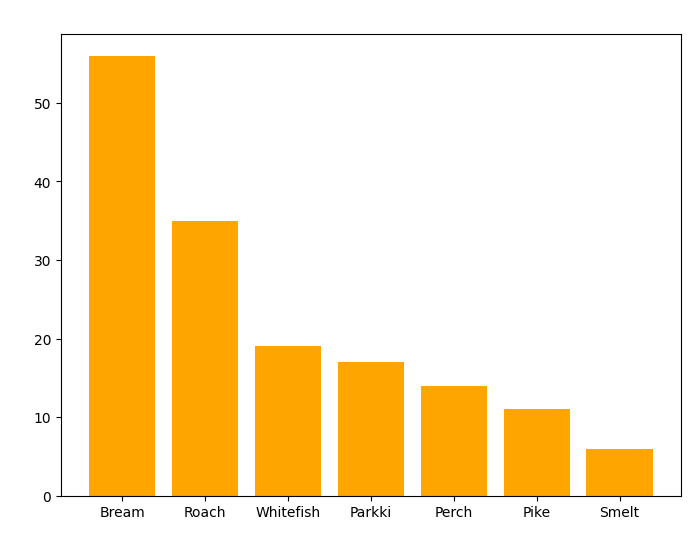

In [ ]:
# Define the x_labels
species = df['Species'].unique()

# Define the bar chart
plt.figure(figsize=(8,6))
plt.bar(species, df['Species'].value_counts(), color='Orange')

# Graphics
plt.xlabel('Species', fontsize=12, color='White')
plt.ylabel('Number of records', fontsize=12, color ='White')
plt.title('Barplot of number of species in the dataset', fontsize=16, color ='White')

Группировка данных и построение сводных таблиц

In [ ]:
# Average weight, length1, length2, lenght3, height сгруппированы по виду рыб
df_s_group = df.groupby('Species').mean()
df_s_group

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,160.052632,20.731579,22.368421,25.084211,6.706353,3.673968
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


In [ ]:
sp_list = df['Species'].unique()
for sp in sp_list:
  print(sp)
  print(df[df['Species'] == sp].describe())
  print('')

Bream
            Weight    Length1    Length2    Length3     Height      Width
count    35.000000  35.000000  35.000000  35.000000  35.000000  35.000000
mean    617.828571  30.305714  33.108571  38.354286  15.183211   5.427614
std     209.205709   3.593699   3.911925   4.157866   1.964707   0.721509
min     242.000000  23.200000  25.400000  30.000000  11.520000   4.020000
25%     462.500000  28.000000  30.350000  35.650000  13.958900   4.943400
50%     610.000000  30.400000  33.000000  38.500000  14.954400   5.280100
75%     717.000000  31.950000  35.000000  40.750000  16.360900   6.071600
max    1000.000000  38.000000  41.000000  46.500000  18.957000   6.749700

Roach
           Weight    Length1    Length2    Length3     Height      Width
count   19.000000  19.000000  19.000000  19.000000  19.000000  19.000000
mean   160.052632  20.731579  22.368421  25.084211   6.706353   3.673968
std     83.528088   3.532398   3.727384   4.108699   1.294663   0.705412
min     40.000000  12.900000 

Как показано в таблицах выше, каждый вид сильно отличается от другого.

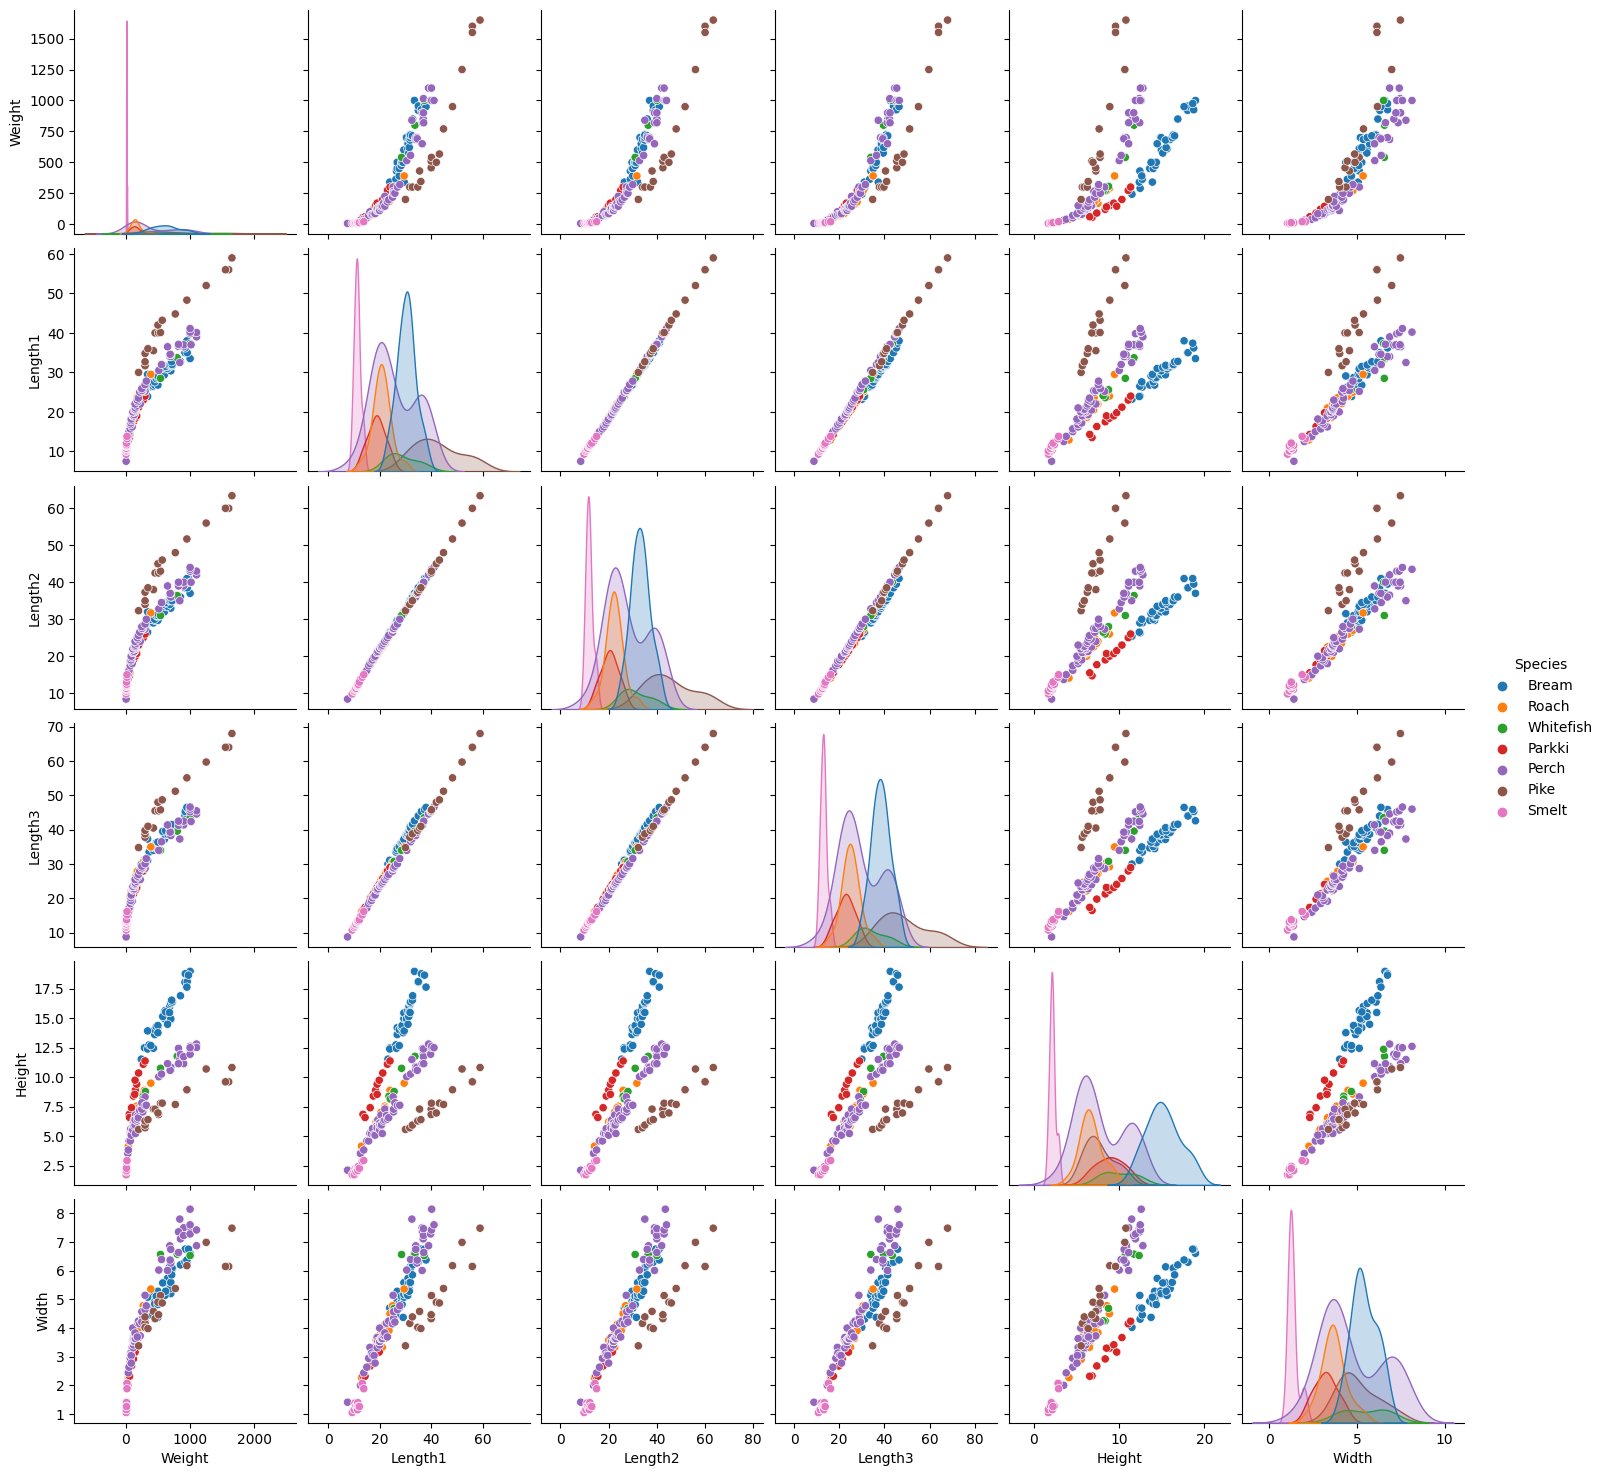

In [ ]:
sns.pairplot(df, kind='scatter', hue='Species')

In [ ]:
sp_list = df['Species'].unique()
for sp in sp_list:
  print(sp)
  print(df[df['Species'] == sp].corr())
  print('')

Bream
           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.937050  0.946256  0.947136  0.964528  0.925303
Length1  0.937050  1.000000  0.997713  0.996353  0.939384  0.899298
Length2  0.946256  0.997713  1.000000  0.998237  0.950391  0.915717
Length3  0.947136  0.996353  0.998237  1.000000  0.952900  0.921206
Height   0.964528  0.939384  0.950391  0.952900  1.000000  0.926692
Width    0.925303  0.899298  0.915717  0.921206  0.926692  1.000000

Roach
           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.949103  0.953015  0.954571  0.957389  0.969207
Length1  0.949103  1.000000  0.998439  0.996040  0.947125  0.959176
Length2  0.953015  0.998439  1.000000  0.997591  0.954135  0.962689
Length3  0.954571  0.996040  0.997591  1.000000  0.960029  0.964261
Height   0.957389  0.947125  0.954135  0.960029  1.000000  0.952996
Width    0.969207  0.959176  0.962689  0.964261  0.952996  1.000000

Whitefish
           Weight   Leng

<ipython-input-19-8e5a0d200b03>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df['Species'] == sp].corr())
<ipython-input-19-8e5a0d200b03>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df['Species'] == sp].corr())
<ipython-input-19-8e5a0d200b03>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df['Species'] == sp].corr())
<ipython-input-19-8e5a0d200b03>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a fu

**Составим корреляционную матрицу**

In [ ]:
# 1й способ
df.corr()

<ipython-input-20-21ba08185382>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


In [ ]:
# 2й способ
correlation_matrix= df.corr()
correlation_matrix

<ipython-input-21-85f89e1716c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= df.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Как мы видим, лучше дифференцировать модель на основе «видов», чтобы максимизировать корреляцию между независимыми переменными (x) и зависимой переменной (y).
<br>
Важно отметить, что отношения между независимой переменной "Длина" (Height) и зависимой переменной "Вес" (Weight) сильно коррелированы, если вы рассматриваете виды один раз за раз. Этого не происходит, когда мы рассматриваем весь набор данных.

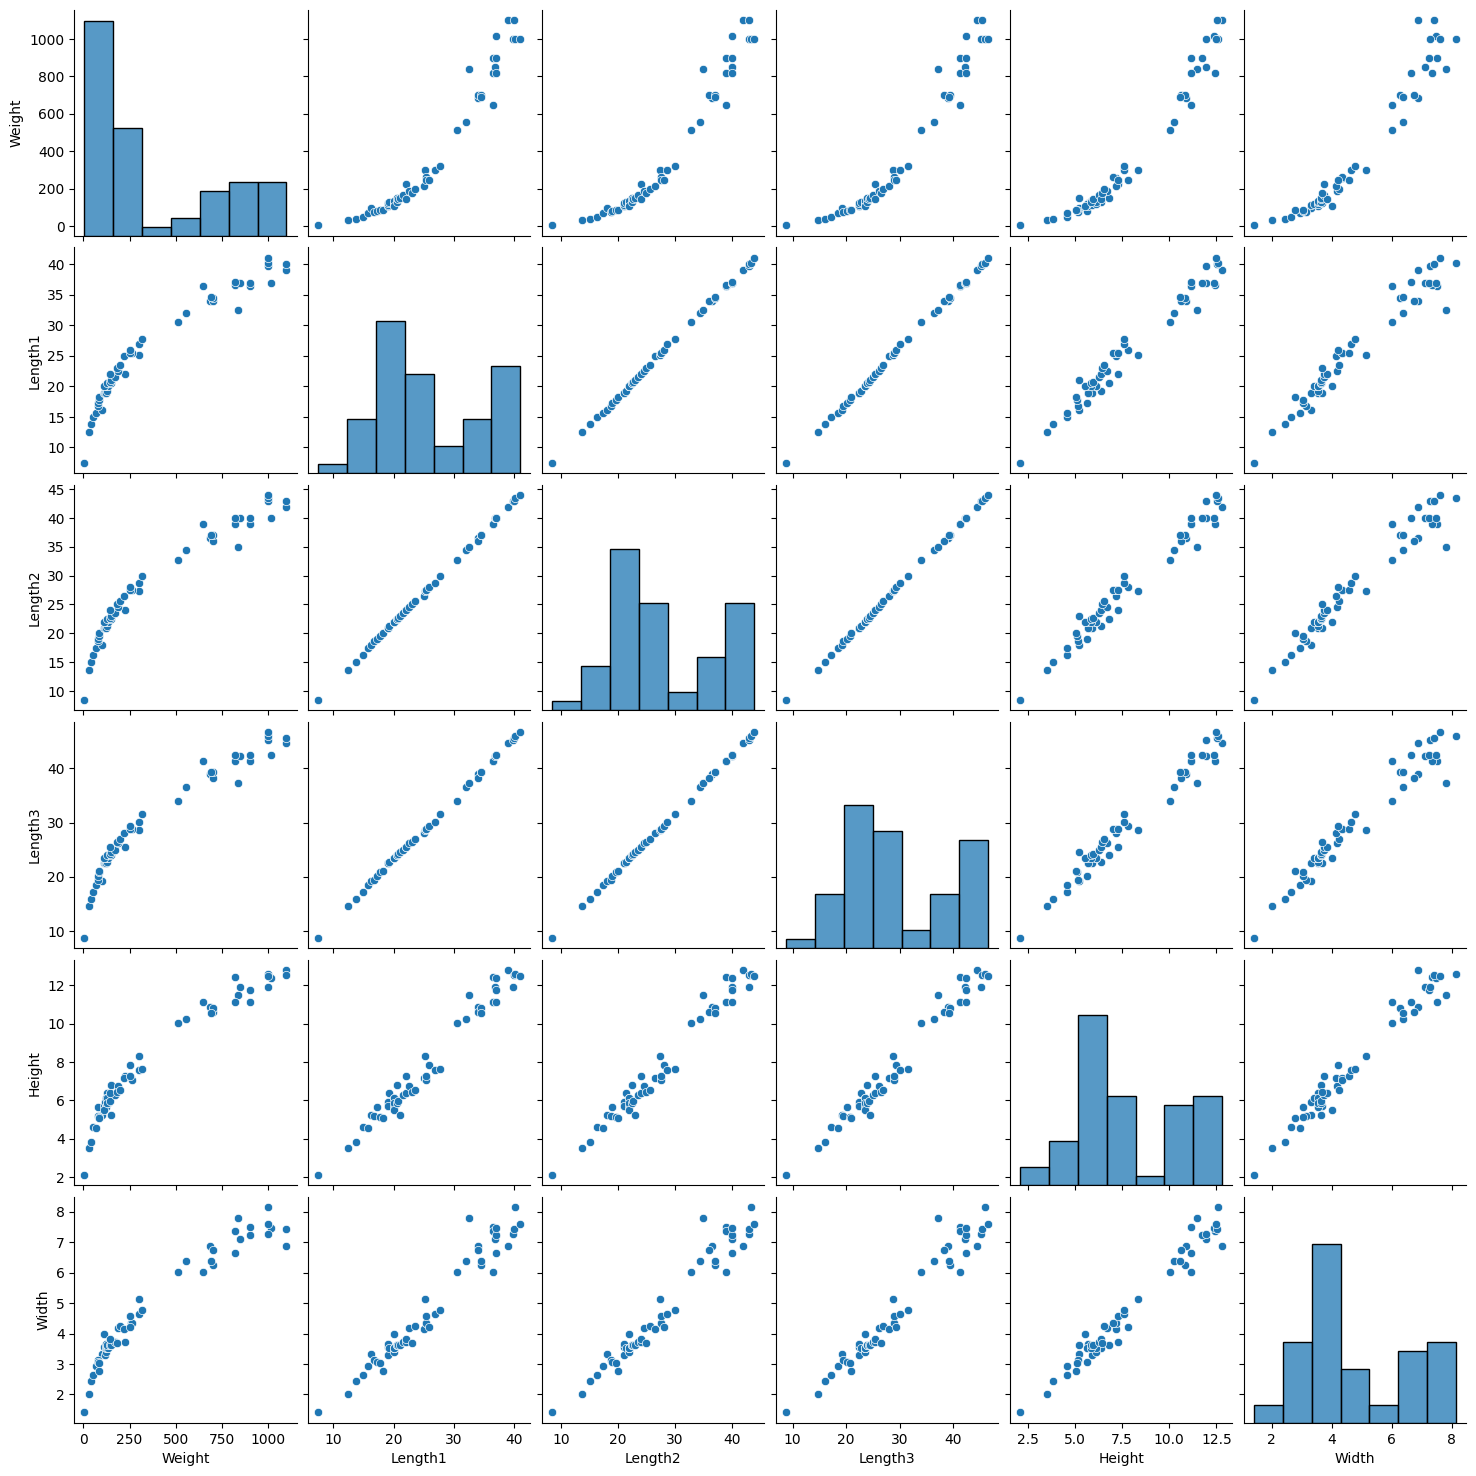

In [ ]:
df_Perch = df[df['Species'] == 'Perch']
sns.pairplot(df_Perch, kind='scatter')

**Примечание:**
<br>
Вероятно, это хорошая идея построить 2 разные модели. Первая использует все имеющиеся у нас функции, вторая модель выполняет уменьшение размерности с использованием *анализа основных компонентов* и сохраняет, вероятно, только один из столбцов «Длина1», «Длина2» и «Длина3».

Для простоты в этом случае мы будем подбирать модели, рассматривая весь набор данных как обобщение.

**Визуализация матрицы корреляции**

<function matplotlib.pyplot.show(close=None, block=None)>

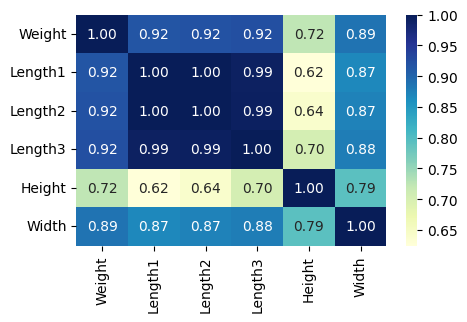

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

Здесь мы видим, что 'Длина1' и 'Длина2' сильно коррелируют друг с другом, и их корреляция равна 1. Но оба представляют разные характеристики рыбы, то есть вертикальную длину рыбы (Длина1 в см), а Длина2 — диагональную длину рыбы в см. Оба имеют свое индивидуальное значение.

In [ ]:
# Давай проверим нет. уникальных значений в столбце видов
df["Species"].nunique()

7

In [ ]:
# Давайте посмотрим уникальные значения в столбце видов рыб 'Species'
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

<font color=darkviolet><b>
**Корреляция и причинно-следственная связь (Пирсон и значение P)**</b>

**Корреляция:** мера степени взаимозависимости между переменными.
<br>
**Причинность:** отношение между причиной и следствием между двумя переменными.
<br>
Важно знать разницу между этими двумя и то, что корреляция не подразумевает причинно-следственной связи. Определение корреляции намного проще, чем определение причинно-следственной связи, т.к. причинно-следственная связь может потребовать независимых экспериментов.

**Корреляция Пирсона**</p>

Корреляция Пирсона измеряет линейную зависимость между двумя переменными X и Y.
<br>
Результирующий коэффициент представляет собой значение от -1 до 1 включительно, где:
<br>
**1**: Общая положительная линейная корреляция.
<br>
**0**: Нет линейной корреляции, две переменные, скорее всего, не влияют друг на друга..
<br>
**-1**: Общая отрицательная линейная корреляция.

**P-значение:**
<br>
<br>
**P-значение** — значение вероятности того, что корреляция между этими двумя переменными является статистически значимой. Обычно мы выбираем уровень значимости 0.05, что означает, что мы на 95% уверены в значимости корреляции между переменными.

По соглашению, когда
<br>
**значение p <0,001**: мы говорим, что есть убедительные доказательства того, что корреляция значительна.
<br>
**значение p <0,05**: есть умеренные доказательства значимости корреляции.
<br>
**значение p <0,1**: есть слабые доказательства значимости корреляции.
<br>
**значение p> 0,1**: нет никаких доказательств того, что корреляция является значимой.

In [ ]:
# Import из scipy библиотеки модуль stats
from scipy import stats

Определим, когда корреляция между зависимой переменной «Вес» и независимыми переменными является статистически значимой.

In [ ]:
col_list = df.columns.to_list()[2:]
Y = df['Weight']
for x_pearson in col_list:
  pearson_coef, p_value = stats.pearsonr(df[x_pearson], Y)
  print(x_pearson)
  print('Коэффициент корреляции Пирсона = ', pearson_coef, ' P-значение = ', p_value)
  print('')

Length1
Коэффициент корреляции Пирсона =  0.9157194765927307  P-значение =  1.177618106286436e-63

Length2
Коэффициент корреляции Пирсона =  0.9186031427305779  P-значение =  8.735426730041972e-65

Length3
Коэффициент корреляции Пирсона =  0.9230903225789496  P-значение =  1.2515672506506248e-66

Height
Коэффициент корреляции Пирсона =  0.7238573271171123  P-значение =  6.281795502828694e-27

Width
Коэффициент корреляции Пирсона =  0.8866536392737759  P-значение =  4.017578588598578e-54



**Резюме исследования данных**
<br>
Все столбцы хорошо связаны с зависимой переменной. Мы можем использовать их все или выполнить PCA, чтобы уменьшить количество независимых переменных.

**Разработка модели**
<br>
В этом разделеразработаем несколько моделей, которые будут предсказывать вес рыбы с использованием переменных (или признаков). Это всего лишь оценка, но она должна дать объективное представление о том, сколько должна весить рыба.
<br>
Модель поможет понять точную взаимосвязь между различными переменными и то, как эти переменные используются для прогнозирования результата.

<font color=darkviolet size=4><b>
**Simple (простая) Linear Regression  и Multiple (множественная) Linear Regression**</b></font>

<br>
<b><font color=green>Простая линейная регрессия</b></font> — это метод, помогающий нам понять взаимосвязь между двумя переменными:
<br>
Предиктор/независимая переменная (X)
<br>
Отклик/зависимая переменная (которую мы хотим предсказать) (Y)
<br>
*Результат линейной регрессии:* линейная функция, которая предсказывает ответную (зависимую) переменную как функцию предиктора (независимой) переменной.

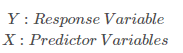

**Линейная функция:**

image.png

<b>a</b> относится к точке пересечения линии регрессии, другими словами: значение Y, когда X равно 0;
<br>
<b>b</b> относится к наклону линии регрессии, другими словами: значение, с которым меняется Y, когда X увеличивается на 1 единицу.

In [ ]:
# Импорт LinearRegression из sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# определение LinearRegression model
lm = LinearRegression()
lm

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Определение переменных X и переменной Y.
# Учитывая тест Пирсона, лучшая переменная для разработки простой линейной регрессии — «Длина3» ('Length3')
X = df[['Length3']]
Y = df[['Weight']]

lm.fit(X,Y)

LinearRegression()

In [ ]:
# Печать точки пересечения и коэффициента линейной регрессии
pd.DataFrame([lm.coef_, lm.intercept_], index=['coefficient', 'intercept'], columns=['Линейная регрессия'])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,Линейная регрессия
coefficient,28.396851
intercept,-487.41681


<Axes: xlabel='Length3', ylabel='Weight'>

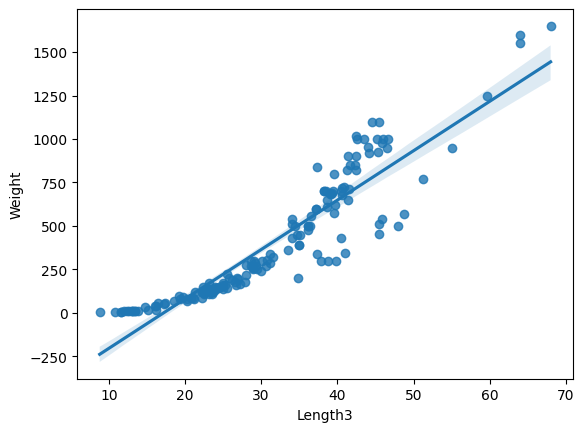

In [ ]:
# seaborn для графика Linear Regression model
import seaborn as sns
sns.regplot(x = X, y = Y)

**Это хорошая аппроксимация? Это хорошая модель?**
<br>
Чтобы оценить модель и сравнить ее с другими, важно применять метрики, которые обобщают ее. Этими показателями могут быть **R^2** и **среднеквадратическая ошибка**. </br> R^2 говорит нам, насколько хорошо линейная регрессия аппроксимирует данные.

In [ ]:
# импорт метрик
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<Axes: xlabel='Length3', ylabel='Weight'>

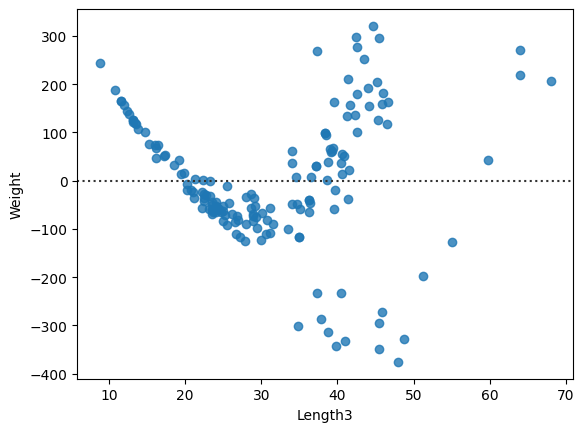

In [ ]:
sns.residplot(x=X,y=Y)

Можно заметить, что невязка не распределена случайным образом вокруг среднего значения. Это означает, что даже если простая линейная регрессия является хорошей аппроксимацией распределения, существуют другие модели, которые лучше отражают данные.

In [ ]:
Yhat_lm = lm.predict(X)
Yhat_lm[0:4]

array([[364.48871564],
       [398.56493667],
       [395.72525159],
       [463.87769365]])

In [ ]:
mse_lm = mean_squared_error(Y,Yhat_lm)
r_score_lm = r2_score(Y, Yhat_lm)
print(pd.DataFrame([mse_lm, r_score_lm], index=['MSE', 'R^2'], columns=['Метрики качества']))

     Метрики качества
MSE      18804.239114
R^2          0.852096


**Автоматизируем процесс для всех столбцов**

In [ ]:
# Используйте col_list для определения независимой переменной.

for x in col_list:
  print(x)
  loop_lm = LinearRegression().fit(df[[x]], Y)
  print('The intercept = ', loop_lm.intercept_, ' и coefficient = ', loop_lm.coef_)
  Yhat_loop_lm = loop_lm.predict(df[[x]])
  print('Mean Squared Error = ', mean_squared_error(Y, Yhat_loop_lm), ' и R^2= ', r2_score(Y,Yhat_loop_lm))
  print('')

Length1
The intercept =  [-459.40016022]  и coefficient =  [[32.7176962]]
Mean Squared Error =  20527.413533952258  и R^2=  0.8385421598112646

Length2
The intercept =  [-470.71625158]  и coefficient =  [[30.61790016]]
Mean Squared Error =  19854.908109214986  и R^2=  0.8438317338344943

Length3
The intercept =  [-487.41681019]  и coefficient =  [[28.39685086]]
Mean Squared Error =  18804.23911410419  и R^2=  0.852095743638909

Height
The intercept =  [-140.89307841]  и coefficient =  [[60.28187533]]
Mean Squared Error =  60521.535240015  и R^2=  0.5239694300211301

Width
The intercept =  [-429.91326478]  и coefficient =  [[187.77514373]]
Mean Squared Error =  27187.849113739725  и R^2=  0.7861546760374312



**Анализ:**
<br>
Если нужно использовать простую линейную регрессию в качестве модели, наилучшее представление данных и наиболее близкий прогноз будут достигнуты при использовании столбца «Длина 3».

<b><font color=green>**Множественная линейная регрессия**

Что, если требуется предсказать вес рыбы, используя более одной переменной?

Если мы хотим использовать больше переменных в нашей модели для прогнозирования веса рыбы, мы можем использовать ***множественную линейную регрессию***.
<br> Множественная линейная регрессия очень похожа на простую линейную регрессию, но этот метод используется для объяснения взаимосвязи между одной переменной непрерывного отклика (зависимой) и двумя или более переменными-предикторами (независимыми).
<br> Большинство реальных регрессионных моделей включают несколько предикторов.
Проиллюстрируем структуру с помощью четырех переменных-предикторов, но эти результаты можно обобщить на любое целое число:

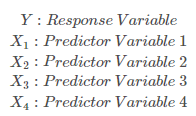

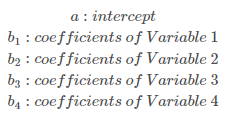

Уравнение:

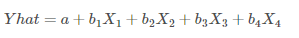

Из предыдущего анализа мы подчеркнули, что все имеющиеся у нас зависимые переменные хороши для прогнозирования веса рыбы. Мы собираемся использовать их все для обучения модели.

In [ ]:
# Определить модель множественной линейной регрессии и независимые переменные.
#Обучить его на зависимых и независимых переменных.
X = df[col_list]
mlrm = LinearRegression().fit(X,Y)
mlrm

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('intercept = ', mlrm.intercept_, ' и coefficients = ', mlrm.coef_)

intercept =  [-496.80227301]  и coefficients =  [[ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976]]


<ipython-input-45-64f9fcdadbde>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(Y, hist=False, color='Red', label='Actual weight')
<ipython-input-45-64f9fcdadbde>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat_mlrm, hist=False, color='Blue', ax=ax1, label='Predic

<Axes: ylabel='Density'>

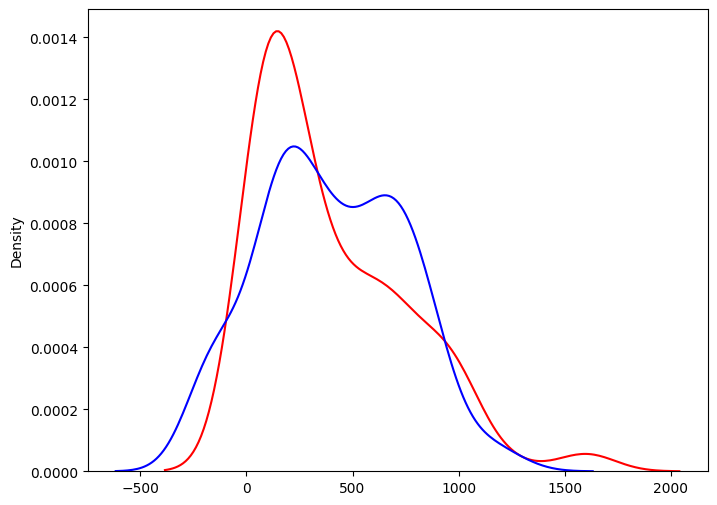

In [ ]:
# Давайте построим распределение Y и прогнозируемого Y
Yhat_mlrm = mlrm.predict(X)

plt.figure(figsize=(8,6))

ax1 =  sns.distplot(Y, hist=False, color='Red', label='Actual weight')
sns.distplot(Yhat_mlrm, hist=False, color='Blue', ax=ax1, label='Predicted weight')

Как мы видим, распределение прогнозируемых значений близко к распределению фактических значений, но есть возможности для улучшения.

In [ ]:
# Вычисление Mean Squared Error и коэффициента детерминации
print('Mean Squared Error = ', mean_squared_error(Y, Yhat_mlrm), ' и R^2 = ', r2_score(Y, Yhat_mlrm))

Mean Squared Error =  14559.640776937467  и R^2 =  0.8854815220690125


Лучшая модель простой линейной регрессии, которую мы обучали до сих пор, дает следующие результаты:
<br>
Length3 Среднеквадратическая ошибка составляет 18804,23911410419, а оценка R^2 составляет 0,852095743638909 </br> Учитывая, что среднеквадратическая ошибка множественной линейной регрессии ниже, чем среднеквадратическая ошибка модели простой линейной регрессии, обученной на столбце «Длина3». , MLR предсказывает вес рыбы лучше, чем SLR.</br> А как насчет показателя R^2? </br> Оценка R^2 модели множественной линейной регрессии выше, чем у модели SLR. Это означает, что в целом MLRM лучше соответствует набору данных.

<b><font color=green>**Пайплайн и Polynomial Regressions (Полиномиальная регрессия)**

**Полиномиальная регрессия** — частный случай общей модели линейной регрессии или моделей множественной линейной регрессии.
<br>
Мы получаем нелинейные отношения, возводя в квадрат или устанавливая члены более высокого порядка переменных-предикторов.
<br>
Существуют различные порядки полиномиальной регрессии:

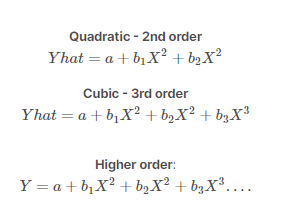

Давайте посмотрим, можно ли подогнать к данным полиномиальную модель регрессии.
Будем использовать следующую функцию для построения графика данных:

In [ ]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(min(independent_variable)*0.98, max(independent_variable)*1.01, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Weight')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Weight of fish')

    plt.show()
    #plt.close()

In [ ]:
# Обучение 5 degrees polynome
pol = np.polyfit(df['Width'], df['Weight'], 5)
func = np.poly1d(pol)
print(func)

       5         4         3         2
0.464 x - 12.93 x + 123.6 x - 478.4 x + 820.4 x - 478


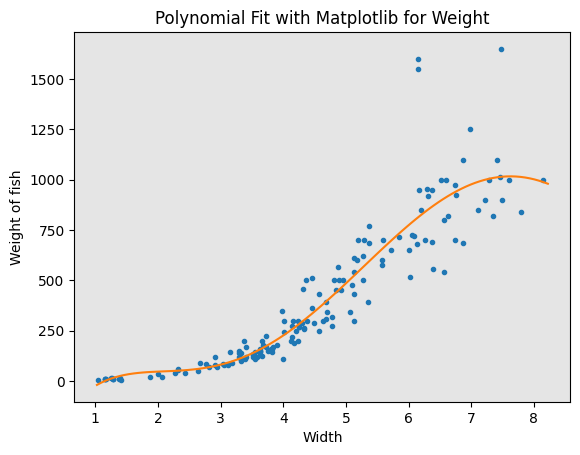

In [ ]:
PlotPolly(func, df['Width'], df['Weight'], 'Width')

Модель, кажется, лучше представляет распределение.

           5            4          3         2
6.555e-05 x - 0.008615 x + 0.3758 x - 5.519 x + 23.09 x + 45.21


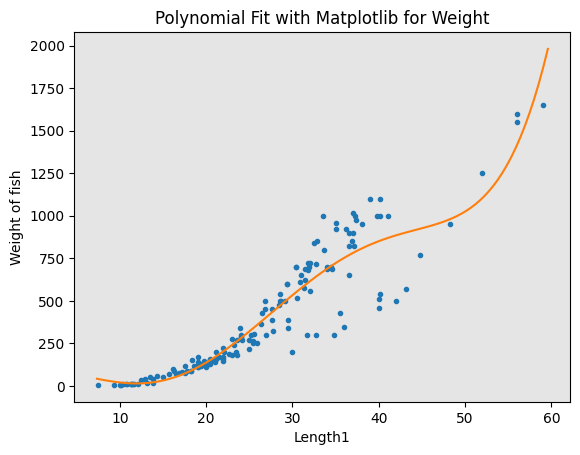

           5            4          3         2
4.729e-05 x - 0.006906 x + 0.3432 x - 6.262 x + 43.66 x - 67.86


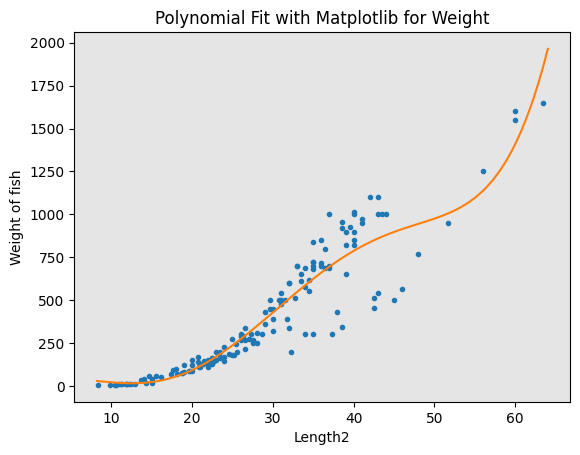

           5            4        3         2
3.384e-05 x - 0.005831 x + 0.36 x - 9.304 x + 111.4 x - 491.6


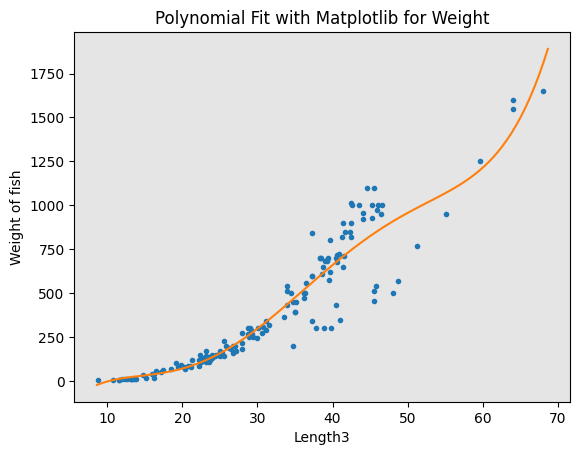

         5          4         3         2
0.01212 x - 0.4145 x + 3.169 x + 17.44 x - 163.9 x + 263.4


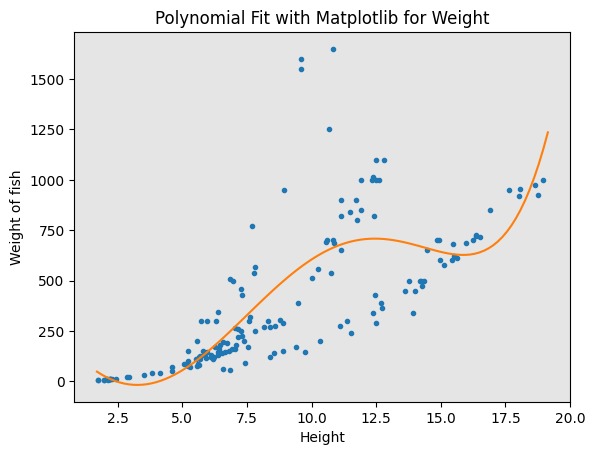

       5         4         3         2
0.464 x - 12.93 x + 123.6 x - 478.4 x + 820.4 x - 478


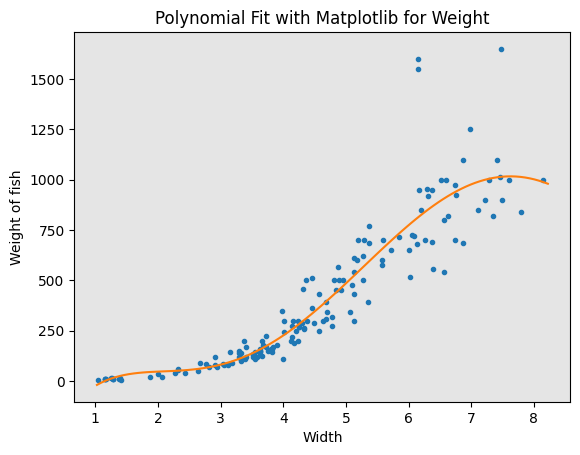

In [ ]:
for x in col_list:
  pol_loop = np.polyfit(df[x], df['Weight'], 5)
  func_loop = np.poly1d(pol_loop)
  print(func_loop)
  plt.figure()
  PlotPolly(func_loop, df[x], Y, Name=x)
  plt.show()

Аналитическое выражение для многомерной полиномиальной функции усложняется. Например, выражение для полинома второго порядка (степень = 2) с двумя переменными имеет вид:

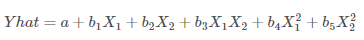

Можно выполнить полиномиальное преобразование для нескольких функций. Сначала импортируем модуль:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Определить функции, которые мы должны принять во внимание для этой модели.
X_polF = df[col_list]

In [ ]:
# Определить Input для pipeline
Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]

In [ ]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Pipeline(memory=None,<br>
         steps=[('standardscaler',<br>
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',<br>
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),<br>
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
pipe.fit(X_polF, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Yhat_pipe = pipe.predict(X_polF)
Yhat_pipe[0:4]

array([[275.57298839],
       [311.10823537],
       [331.34122018],
       [396.98670455]])

<ipython-input-57-8c2b5f9e7af4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(Y, hist=False, color='Red', label='Actual values')
<ipython-input-57-8c2b5f9e7af4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat_pipe, hist=False, color='Green', label='Predicted valu

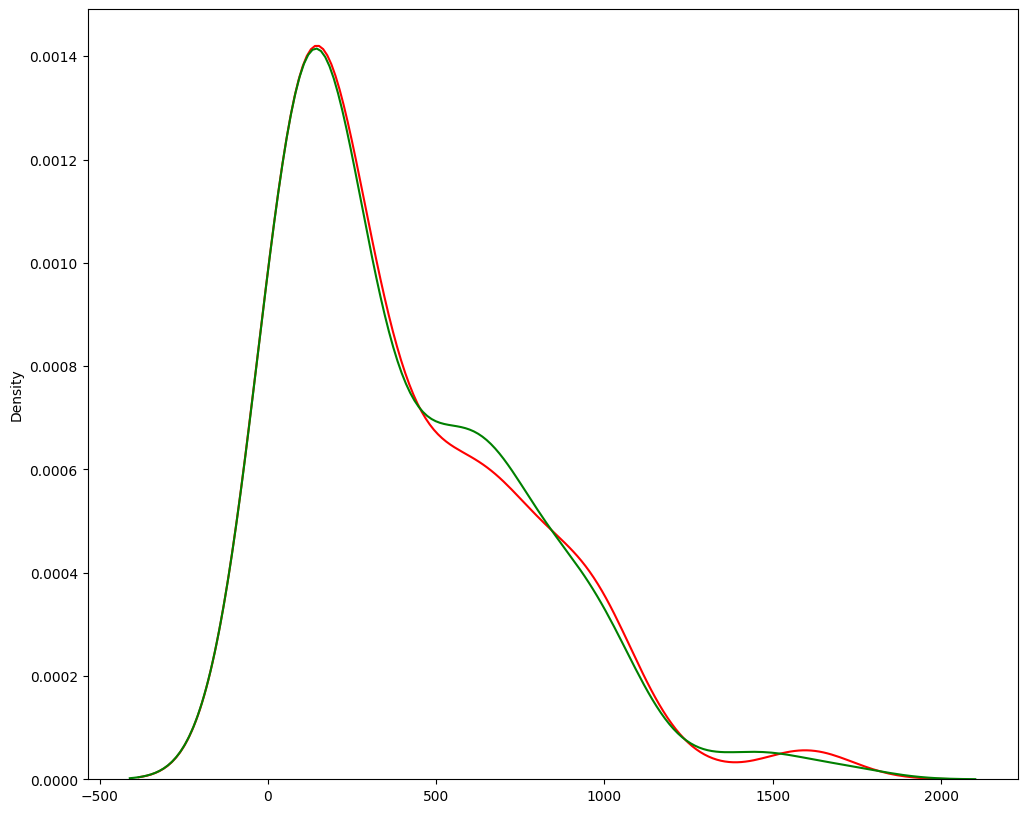

In [ ]:
# Мы можем визуализировать распределение Yhat_pipe и фактические значения Y,
#чтобы понять, является ли модель регрессии полиномиальных признаков лучшей моделью.
plt.figure(figsize=(12,10))
ax2 = sns.distplot(Y, hist=False, color='Red', label='Actual values')
sns.distplot(Yhat_pipe, hist=False, color='Green', label='Predicted values')
plt.show()

Как видно из распределения, ***модель регрессии полиномиальных признаков*** лучше отображает данные. Теперь нам нужно сделать некоторую оценку модели. </br> </br> Предыдущей лучшей моделью была следующая простая линейная регрессия: </br>
_Length3 Среднеквадратическая ошибка равна 18804,23911410419, а оценка R^2 равна 0,852095743638909_
</br> Давайте рассчитаем среднеквадратичную ошибку и показатель R^2 для новой модели.

In [ ]:
print("Mean Squared Error для Полиномиальной множественной линейной регрессии = ",
      mean_squared_error(Y, Yhat_pipe), ' R^2 = ', r2_score(Y, Yhat_pipe))

Mean Squared Error для Полиномиальной множественной линейной регрессии =  2034.9441923846166  R^2 =  0.9839941990907136


In [ ]:
Y_pred = pd.DataFrame(data=Yhat_pipe, columns=['Estimate Weight'])
prediction_df = pd.concat([Y_pred, Y], axis=1)
prediction_df

,Estimate Weight,Weight
0,275.572988,242.0
1,311.108235,290.0
2,331.341220,340.0
3,396.986705,363.0
4,414.778751,430.0
...,...,...
154,-9.628337,12.2
155,-23.649997,13.4
156,13.841608,12.2
157,7.096643,19.7


**Выводы**:
</br> Среднеквадратическая ошибка (MSE) новой модели намного лучше, чем у предыдущих моделей, а показатель **R^2** (коэффициент детерминации) достаточно высок. Это означает, что модель способна почти идеально предсказать вес рыбы, исходя из ее габаритов.